### Math2Tex

In [1]:
from compiler.lexer import Lexer

# Reload modules automatically
%load_ext autoreload
%autoreload 2

lexer = Lexer()

print("----------------------------------------------")
file = open("examples/" + 'example1.txt', 'r')
print(file.read())
file.close()
print("----------------------------------------------")

lexer.lex_file("examples/" + 'example1.txt')


----------------------------------------------
math{
    equation{
        g(x) = sin(x) + cos(2x)
    }
}
----------------------------------------------


[KW_MATH(math),
 L_CURL_BRACKET({),
 KW_EQUATION(equation),
 L_CURL_BRACKET({),
 IDENTIFIER(g),
 L_PAREN((),
 IDENTIFIER(x),
 R_PAREN()),
 EQUOP_EQUAL(=),
 IDENTIFIER(sin),
 L_PAREN((),
 IDENTIFIER(x),
 R_PAREN()),
 OP_PLUS(+),
 IDENTIFIER(cos),
 L_PAREN((),
 LIT_INT(2),
 IDENTIFIER(x),
 R_PAREN()),
 R_CURL_BRACKET(}),
 R_CURL_BRACKET(})]

In [2]:
from compiler.parser import Parser

lexer = Lexer()
lexems = lexer.lex_file("examples/" + 'example1.txt')
parser = Parser(lexems)
ast = parser.parse()
print(ast)

Parsing successful!


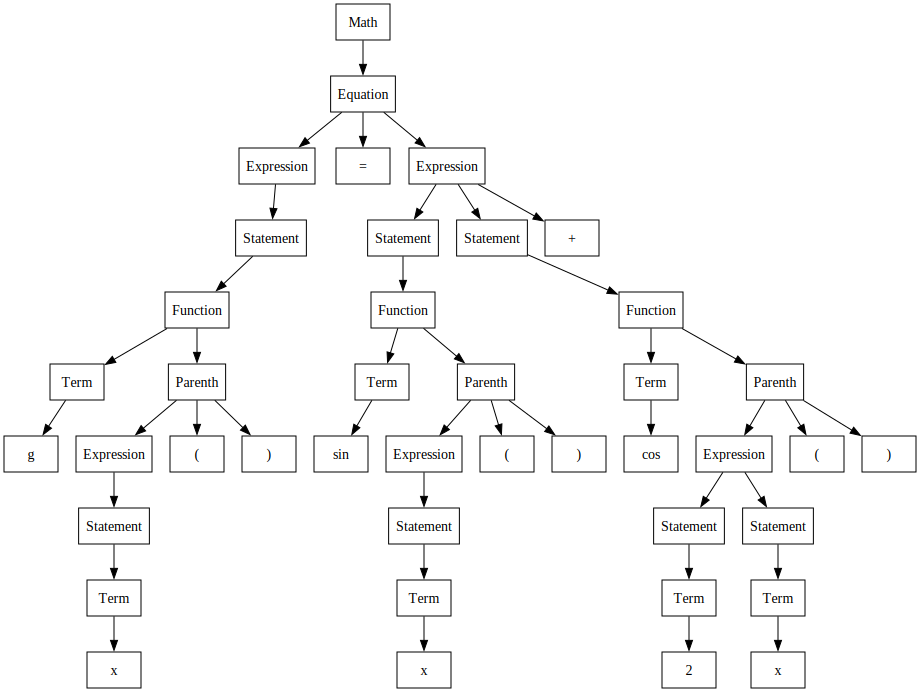

In [3]:
from compiler.graph import GraphGenerator

graph = GraphGenerator()
graph.generate_graph(ast)

In [10]:

from compiler.visitor import LatexGeneratorVisitor

# -*- encoding: utf-8 -*-
from compiler.parser import Parser
from compiler.lexer import Lexer

%reload_ext autoreload
%autoreload 2

lexer = Lexer()
lexems = lexer.lex_file(file='examples/example1.txt')
parser = Parser(lexems=lexems)
print('———————————————————————————————————————————————')
with open('examples/example1.txt', 'r') as f:
    print(f.read())
print('———————————————————————————————————————————————')
ast = parser.parse()

visitor = LatexGeneratorVisitor()
ast.accept(visitor)

print('———————————————————————————————————————————————')
print('Formatted code: ')
visitor.get_text()

———————————————————————————————————————————————
math{
    equation{
        g(x) = sin(x) + cos(2x)
    }
}
———————————————————————————————————————————————
Parsing successful!
———————————————————————————————————————————————
Formatted code: 
\begin{math}
    \begin{equation}
        g(x) = sin(x) + cos(2x)
    \end{equation}
\end{math}
